### Парсинг данных и создание датафрейма

In [ ]:
import os
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
def procents(d):
    l = len(d)
    res = []
    for name in set(d['name']):
        count = len(d[d['name'] == name])
        res.append((name, count, count/l*100))
    return pd.DataFrame(res, columns=['name', 'count', 'percent'])

In [3]:
def dose_weights(d):
    l = len(d)
    res = []
    total_dose = sum(d['dE'])
    for name in set(d['name']):
        particle_filt = d[d['name'] == name]
        dose = sum(particle_filt['dE'])
        res.append((name, dose, dose/total_dose*100))
    return pd.DataFrame(res, columns=['name', 'dose', 'dose_percent'])

In [15]:
def get_z_dose_bins(d, bins=100):
    borders = np.linspace(-20, 20, bins)
    bins = []
    for i in tqdm(range(len(borders[:-1]))):
        dd = d[d['z'] > borders[i]]
        dd = dd[dd['z'] < borders[i+1]]
        bins.append(sum(dd['dE']))
        del dd
    return np.array(borders[:-1])+20, np.array(bins)

In [5]:
def get_energy_count_bins(d, bins=100):
    n, e = np.histogram(d['energy'], bins)
    return e[:-1], n

In [6]:
pnames = {'annihil':'Аннигиляция','compt':'Комптон-эффект','conv':'Рождение пар',
          'eBrem':'Тормозное излучение','eIoni':'Ионизационные потери','hadElastic':'?',
          'phot':'Фотоэффект','photonNuclear':'?'}

In [7]:
def load_data(folder = 'build', secondary=True, drop_creator=True):
    paths = glob.glob(f"{folder}/*.csv")
    with open(paths[0], 'r') as f:
        print(f"Headers from file: {paths[0]}")
        hlines = []
        while True:
            line = f.readline()
            if len(line) == 0 or line[0] != '#':
                break
            hlines.append(line)
        title = hlines[1].replace('#title ', '')[:-1]
        sep = chr(int(hlines[2].replace('#separator ', '')[:-1]))
        vsc_sep = chr(int(hlines[3].replace('#vector_separator ', '')[:-1]))
        columns = [' '.join(l.split(' ')[2:])[:-1] for l in hlines[4:]]
        meta_len = len(hlines)
    data = pd.DataFrame()
    for path in tqdm(paths):
        item = pd.read_csv(path, skiprows=meta_len, names=columns)
        
        if secondary:
            item = item[item['creator_process'] != 'user']
            item = item.drop('creator_process', axis=1)
        
        data = pd.concat([data, item], ignore_index=True)
    return data

In [8]:
secondary = load_data('data_10M_water')
# data2 = load_data('build')
# data3 = load_data('data_geen_acrylic')

Headers from file: data_10M_water/Run0_nt_ParticleData_t8.csv


100%|███████████████████████████████████████████| 20/20 [01:33<00:00,  4.67s/it]


In [10]:
print(len(secondary))

177107669


In [12]:
secondary2 = secondary[:100*10**6]

In [13]:
del secondary

In [ ]:
secondary = data

In [ ]:
print()
print(len(data) - )

In [ ]:
secondary = data[data['creator_process'] != 'user']
secondary2 = data2[data2['creator_process'] != 'user']
secondary3 = data3[data3['creator_process'] != 'user']
print(sum(secondary2['dE'])/sum(secondary['dE']))
print(sum(secondary3['dE'])/sum(secondary['dE']))

In [ ]:
print(sum(data2['dE'])/sum(data['dE']))
print(sum(data3['dE'])/sum(data['dE']))

## "Первичные" ускорительные частицы

In [ ]:
primary = data[data['creator_process'] == 'user']
print(len(primary))
# procents(primary)

In [ ]:
primary2 = data2[data2['creator_process'] == 'user']
print(len(primary2))

In [ ]:
# print('Суммарная доза от первичных частиц:', sum(dose_weights(primary)['dose']))
# dose_weights(primary)

## Вторичные частицы в фантоме

In [14]:
# secondary = data[data['creator_process'] != 'user']
print('Количество вторичных частиц', len(secondary2))
print('Суммарная доза от вторичных частиц:', sum(dose_weights(secondary2)['dose']))
dose_weights(secondary2)

Количество вторичных частиц 100000000
Суммарная доза от вторичных частиц: 4875262.791163675


,name,dose,dose_percent
0,O18,6.523109e-01,1.338002e-05
1,neutron,5.540511e-01,1.136454e-05
2,e+,2.184126e+05,4.480017e+00
3,alpha,7.442076e+02,1.526497e-02
4,N15,1.081206e+01,2.217739e-04
5,O15,6.472603e-01,1.327642e-05
6,O16,4.674042e+02,9.587261e-03
7,deuteron,3.546972e+00,7.275449e-05
8,gamma,4.077506e+02,8.363664e-03
9,O17,2.991172e-02,6.135407e-07


In [ ]:
secondary2 = data2[data2['creator_process'] != 'user']
print('Количество вторичных частиц', len(secondary2))
print('Суммарная доза от вторичных частиц:', sum(dose_weights(secondary2)['dose']))
dose_weights(secondary2)

## Доза от глубины

**Доза от первичных и вторичных частиц**

In [17]:
# borders1, bins1 = get_z_dose_bins(data)
# borders2, bins2 = get_z_dose_bins(primary)
borders3, bins3 = get_z_dose_bins(secondary2)
# borders4, bins4 = get_z_dose_bins(secondary2)
# borders5, bins5 = get_z_dose_bins(secondary3)

100%|███████████████████████████████████████████| 99/99 [02:40<00:00,  1.62s/it]


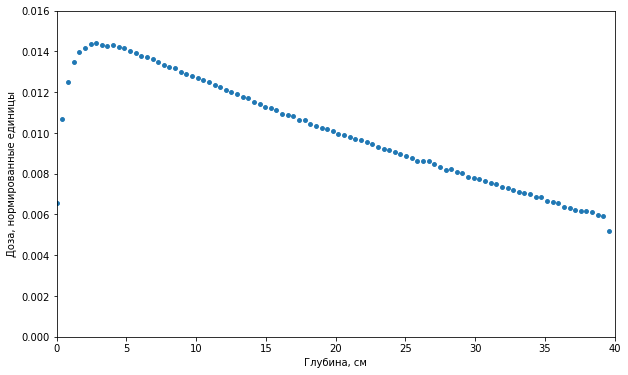

In [26]:
# plt.scatter(borders1, bins1, s=5, label='total')
# plt.scatter(borders2, bins2, s=5, label='primary')
plt.scatter(borders3, bins3/sum(bins3), s=15, marker='o', label='1')
# plt.scatter(borders4, bins4, s=5, marker='v', label='2')
# plt.scatter(borders4, bins4, s=5, marker='s', label='3')
plt.ylim([0, 0.016001])
plt.xlim([0, 40.01])
# plt.yscale('log')
plt.ylabel('Доза, нормированные единицы')
plt.xlabel('Глубина, см')
# plt.legend()
plt.show()

**Доза от первичных частиц**

In [ ]:
borders1, bins1 = get_z_dose_bins(primary[primary['name'] == 'e-'])
borders2, bins2 = get_z_dose_bins(primary[primary['name'] == 'gamma'])

In [ ]:
plt.scatter(borders1, bins1, s=5, label='e-')
plt.scatter(borders2, bins2, s=5, label='gamma')
plt.xlim([0, plt.xlim()[1]])
# plt.ylim([0, plt.ylim()[1]])
plt.yscale('log')
plt.ylabel('Доза, относительные единицы')
plt.xlabel('Глубина, см')
plt.legend()
plt.show()

**Доза от вторичных частиц**

In [ ]:
secondary = data[data['creator_process'] != 'user']
secondary2 = data2[data2['creator_process'] != 'user']
sum(secondary2['dE'])/sum(secondary['dE'])

In [ ]:
for name in ['e-','e+', 'gamma']:
    borders, bins = get_z_dose_bins(secondary[secondary['name'] == name])
    plt.scatter(borders, bins, s=5, label='Вода, ' + name)
    borders, bins = get_z_dose_bins(secondary2[secondary2['name'] == name])
    plt.scatter(borders, bins, s=5, label='Парафин, '+name)
    
plt.yscale('log')
plt.ylabel('Доза, относительные единицы')
plt.xlabel('Глубина, см')
plt.legend()
plt.show()

## Распределение по энергиям

**Энергия по вторичным частицам**

In [ ]:
for pname in ['gamma', 'e-', 'e+']:
    names_particle = secondary[secondary['name'] == pname]
    energys, counts = get_energy_count_bins(names_particle)
    plt.scatter(energys, counts, s=5, label='Вода, ' + pname)
    
    names_particle = secondary2[secondary2['name'] == pname]
    energys, counts = get_energy_count_bins(names_particle)
    plt.scatter(energys, counts, s=5, label='Парафин, ' + pname)

plt.legend()
# plt.ylim([10, 10**8])
plt.yscale('log')
plt.ylabel('Количество частиц')
plt.xlabel('Энергия, МэВ')
plt.show()

**Энергия вторичной частицы по процессу рождения**

In [ ]:
def energy_by_process(paticles):
    for process in pnames.keys():
        names_process = paticles[paticles['creator_process'] == process]
        if len(names_process) == 0:
            continue
        energys, counts = get_energy_count_bins(names_process)
        plt.scatter(energys, counts, s=5, label=pnames[process])

    plt.legend()
    # plt.ylim([10, 10**8])
    plt.yscale('log')
    plt.ylabel('Количество частиц')
    plt.xlabel('Энергия, МэВ')
    plt.show()

In [ ]:
paticles = secondary[secondary['name'] == 'gamma']
energy_by_process(paticles)

In [ ]:
paticles = secondary[secondary['name'] == 'e-']
energy_by_process(paticles)

In [ ]:
paticles = secondary[secondary['name'] == 'e+']
energy_by_process(paticles)